# Pyber : Farah Clerveau 

### Import, Merge, and Explore Data

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the City and Ride Data
city_data = pd.read_csv("data/city_data.csv")
ride_data = pd.read_csv("data/ride_data.csv")

# Combine the data into a single dataset
city_ride = pd.merge(ride_data, city_data, on="city", how="left")
# Display the data table for preview
city_ride.head()

# don't care about date column, so we'll drop that column 

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


### Create a DataFrame 

In [3]:
city_group = city_ride.groupby("city").agg({"fare":"mean", "ride_id":"count",
                                                    "driver_count" : "mean"})

city_group.sort_values("ride_id")

update_cityride = pd.merge(city_group, city_data, how="left", on=["city", "city"])
rides = update_cityride[["city", "fare", "ride_id","driver_count_x", "driver_count_y", "type"]]

rides["colors"] = ["Gold" if x == "Rural" else "SkyBlue" if x == "Suburban"  else "Coral" for x in rides["type"]]
rides.head()


,city,fare,ride_id,driver_count_x,driver_count_y,type,colors
0,Amandaburgh,24.641667,18,12,12,Urban,Coral
1,Barajasview,25.332273,22,26,26,Urban,Coral
2,Barronchester,36.422500,16,11,11,Suburban,SkyBlue
3,Bethanyland,32.956111,18,22,22,Suburban,SkyBlue
4,Bradshawfurt,40.064000,10,7,7,Rural,Gold


## Task 1: Bubble Plot of Ride Sharing Data

Build a Bubble Plot that showcases the relationship between four key variables:
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)


## Setting up plot variables

In [4]:
# Obtain the x and y coordinates for each of the three city types

# X coordinates are the total number of rides by city by driver count 
x = rides["ride_id"]

# Y coordinates are the average fares 
y = rides["fare"]

# the size of the bubbles (this is what differentiates this graph from scatter) is driver count
s = 10 * rides["driver_count_y"]

# colors (coral, skyblue, gold)
colors = rides["colors"] # has 120 items
colors_unique=  [x for x in colors.unique()]  # has 3 items 

# city type (Urban, suburban, rural)
type_ex = rides["type"] # has 120 items
c_type = [x for x in rides["type"].unique()] # has 3 items 

### Backup - creating 3 subplots 

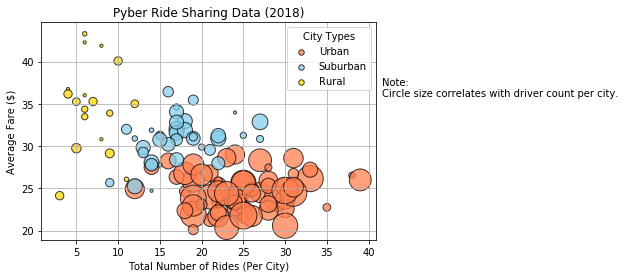

In [5]:
# Build the scatter plots for each city types
fig, ax = plt.subplots()
ridesu = rides[rides["type"] == "Urban"]
ridess = rides[rides["type"] == "Suburban"]
ridesr = rides[rides["type"] == "Rural"]

plt.scatter(ridesu["ride_id"],ridesu["fare"], s = 10* ridesu["driver_count_y"],c="Coral", 
            edgecolors="black", alpha =.75, linewidths = 1, label = "Urban")
plt.scatter(ridess["ride_id"],ridess["fare"],s = 10* ridess["driver_count_y"],c="SkyBlue",
            edgecolors="black", alpha =.75, linewidths = 1, label = "Suburban")
plt.scatter(ridesr["ride_id"],ridesr["fare"],s = 10* ridesr["driver_count_y"],c="Gold", 
            edgecolors="black", alpha =.75, linewidths = 1, label = "Rural")


# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")
plt.grid(True)

# Create a legend
plt.legend(loc='upper right', title =  "City Types" )
lgnd = plt.legend(loc="upper right",title = "City Types", scatterpoints=1, fontsize=10)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size

plt.text(1.02,.7, 'Note: \nCircle size correlates with driver count per city.', ha='left', va='center', transform=ax.transAxes)

# Save Figure
plt.show()

# plt.savefig("PyberBubble_Farah.png")

### Version 1- Using plt.scatter (no for loop)  

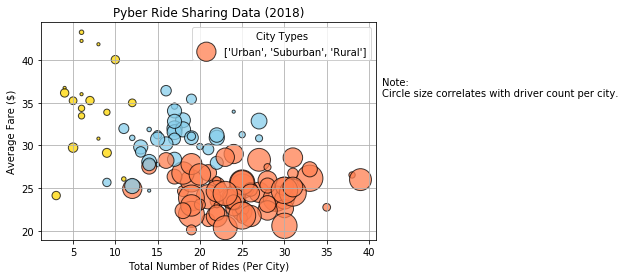

<Figure size 432x288 with 0 Axes>

In [6]:
# Build the scatter plots for each city types
fig, ax = plt.subplots()
plt.plot()
plt.scatter(x, y, s,c=colors, edgecolors="black", alpha =.75, linewidths = 1, label = c_type)
# do I have to use multiple plt.scatters 

# Incorporate the other graph properties
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")
plt.grid(True)

# Create a legend
# ax.legend(loc='upper right', title =  "City Types" )

plt.legend(loc='upper right', title =  "City Types" )

# https://matplotlib.org/examples/lines_bars_and_markers/scatter_with_legend.html

# Incorporate a text label regarding circle size

plt.text(1.02,.7, 'Note: \nCircle size correlates with driver count per city.', ha='left', va='center', transform=ax.transAxes)


# Save Figure
plt.show()

plt.savefig("PyberBubble_Farah.png")


### Version 2- for loop, legend colors accurate, plot area colors wrong

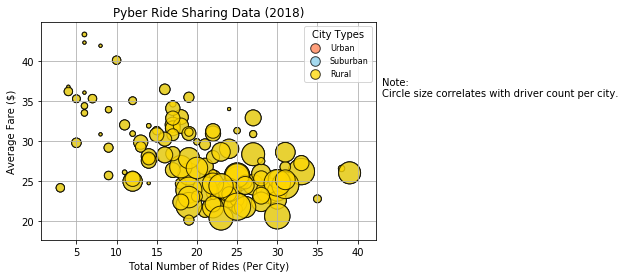

In [7]:
fig, ax = plt.subplots()

type_color_tg = {"Urban":"Coral", "Suburban":"SkyBlue", "Rural":"Gold"}

for a in type_color_tg: # this code makes the legend right but the plot area wrong
    ax.scatter(x,y, c=type_color_tg[a], label=a, s=s, alpha=0.75, edgecolors ='black',linewidth= 1)

ax.legend(loc='upper right', title =  "City Types", markerscale = .50, prop={'size': 8})

ax.grid(True)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")
plt.text(1.02,.7, 'Note: \nCircle size correlates with driver count per city.', ha='left', va='center', transform=ax.transAxes)

# plt.axis([min(x+1),max(x+1),18,50])
plt.show()

### Version 3- for loop, legend colors wrong, plot area colors accurate 

{'Urban': 'Coral', 'Suburban': 'SkyBlue', 'Rural': 'Gold'}
Key is Urban: value is Coral
Key is Suburban: value is SkyBlue
Key is Rural: value is Gold


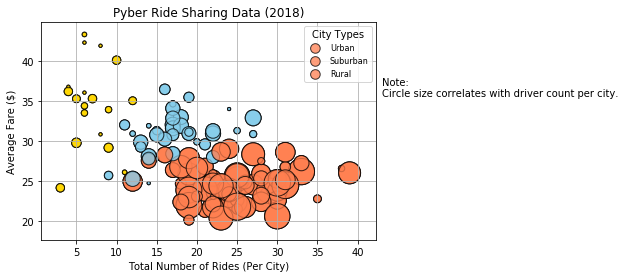

In [8]:
fig, ax = plt.subplots()

type_color_tg = {"Urban":"Coral", "Suburban":"SkyBlue", "Rural":"Gold"}

print(type_color_tg)


for a in type_color_tg: # this code makes the legend wrong but the plot area right
    print("Key is {}: value is {}".format(a,type_color_tg[a]))
    ax.scatter(x,y, c=colors, label=a, s=s, alpha=0.75, edgecolors ='black',linewidth= 1)

ax.legend(loc='upper right', title =  "City Types", markerscale = .50, prop={'size': 8})

ax.grid(True)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")
plt.text(1.02,.7, 'Note: \nCircle size correlates with driver count per city.', ha='left', va='center', transform=ax.transAxes)

# plt.axis([min(x+1),max(x+1),18,50])
plt.show()

### Version 4 - 2 for loops, 2 plots overlayed 

{'Urban': 'Coral', 'Suburban': 'SkyBlue', 'Rural': 'Gold'}
Key is Urban: value is Coral
Key is Suburban: value is SkyBlue
Key is Rural: value is Gold


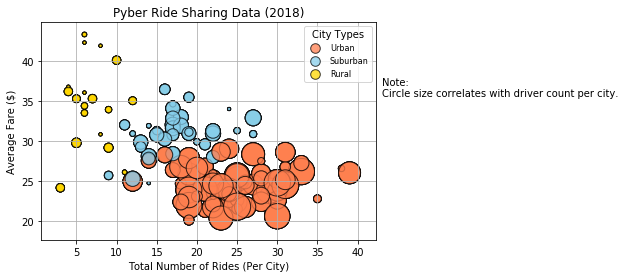

In [9]:
fig, ax = plt.subplots()

type_color_tg = {"Urban":"Coral", "Suburban":"SkyBlue", "Rural":"Gold"}

print(type_color_tg)

for a in type_color_tg: # this code makes the legend right but the plot area wrong
    ax.scatter(x,y, c=type_color_tg[a], label=a, s=s, alpha=0.75, edgecolors ='black',linewidth= 1)

ax.legend(loc='upper right', title =  "City Types", markerscale = .50, prop={'size': 8})

for a in type_color_tg: # this code makes the legend wrong but the plot area right
    print("Key is {}: value is {}".format(a,type_color_tg[a]))
    ax.scatter(x,y, c=colors, label=a, s=s, alpha=0.75, edgecolors ='black',linewidth= 1)


ax.grid(True)
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("Pyber Ride Sharing Data (2018)")
plt.text(1.02,.7, 'Note: \nCircle size correlates with driver count per city.', ha='left', va='center', transform=ax.transAxes)

plt.show()

### Version 5 - Using stack over link

[StackOverFlow Reference](https://stackoverflow.com/questions/47006268/matplotlib-scatter-plot-with-color-label-and-legend-specified-by-c-option?noredirect=1&lq=1)


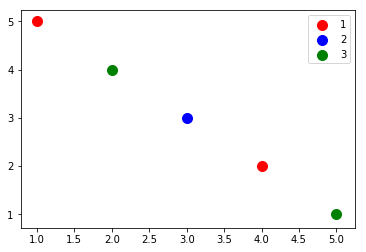

In [10]:
scatter_x = np.array([1,2,3,4,5])
scatter_y = np.array([5,4,3,2,1])
group = np.array([1,3,2,1,3])
cdict = {1: 'red', 2: 'blue', 3: 'green'}

fig, ax = plt.subplots()
for g in np.unique(group):
    ix = np.where(group == g)
    ax.scatter(scatter_x[ix], scatter_y[ix], c = cdict[g], label = g, s = 100)
ax.legend()
plt.show()

#### Reframing StackOverFlow reference

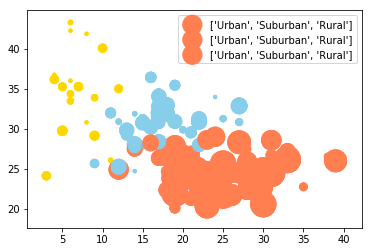

In [11]:

group = type_color_tg
cdict = {1: 'red', 2: 'blue', 3: 'green'}
group2 = rides.to_dict('list')

fig, ax = plt.subplots()
for g in group:
    ax.scatter(x,y, c = colors, label = c_type, s = s)

ax.legend()
plt.show()


# scatter_x = x
# scatter_y = y
# group = rides
# cdict = colors_unique
# group2
# fig, ax = plt.subplots()
# for g in group2:
#     ax.scatter(x, y, c= colors, label = a, s = s)
# ax.legend()
# plt.show()

In [13]:
# plt.plot(x, y, data = color_type_tg)
# plt.show()

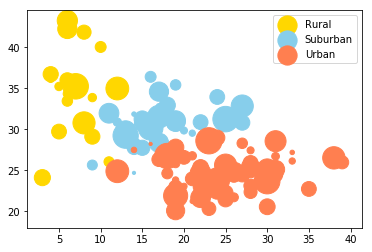

In [18]:
rtypes = rides["type"]
type_color_tg = {"Urban":"Coral", "Suburban":"SkyBlue", "Rural":"Gold"}
np_x = np.array(x)
np_y = np.array(y)
np_types = np.array(rtypes)
size = s
fig, ax = plt.subplots()
for t in np.unique(np_types):
    ix = np.where(np_types == t)
    ax.scatter(np_x[ix], np_y[ix], c = type_color_tg[t], label = t, s = size)
ax.legend()
plt.show()

https://matplotlib.org/gallery/text_labels_and_annotations/legend_demo.html#sphx-glr-gallery-text-labels-and-annotations-legend-demo-py